### [Problem 1] Scratch implementation of BoW

In [2]:
from collections import Counter
from itertools import chain

In [3]:
# Define the sentences
sentences = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"
]

In [4]:
# Preprocess sentences: lowercasing and tokenization
def preprocess(sentences):
    sentences = [sentence.lower() for sentence in sentences]
    tokenized_sentences = [sentence.split() for sentence in sentences]
    return tokenized_sentences

In [5]:
# Generate n-grams
def generate_ngrams(tokenized_sentences, n):
    ngrams_list = []
    for sentence in tokenized_sentences:
        ngrams = zip(*[sentence[i:] for i in range(n)])
        ngrams_list.append([" ".join(ngram) for ngram in ngrams])
    return ngrams_list

In [6]:
# BoW with 1-gram and 2-gram
tokenized_sentences = preprocess(sentences)
unigrams = generate_ngrams(tokenized_sentences, 1)
bigrams = generate_ngrams(tokenized_sentences, 2)

In [7]:
# Flatten the lists
all_unigrams = list(chain.from_iterable(unigrams))
all_bigrams = list(chain.from_iterable(bigrams))

In [8]:
# Count frequency of unigrams and bigrams
unigram_counts = Counter(all_unigrams)
bigram_counts = Counter(all_bigrams)

In [10]:
# Display the counts
print("Unigram Counts:", unigram_counts)
print("Bigram Counts:", bigram_counts)

Unigram Counts: Counter({'movie': 3, 'this': 2, 'is': 1, 'soooo': 1, 'funny!!!': 1, 'what': 1, 'a': 1, 'movie!': 1, 'i': 1, 'never': 1, 'best': 1, 'ever!!!!!': 1})
Bigram Counts: Counter({'this movie': 2, 'movie is': 1, 'is soooo': 1, 'soooo funny!!!': 1, 'what a': 1, 'a movie!': 1, 'movie! i': 1, 'i never': 1, 'best movie': 1, 'movie ever!!!!!': 1, 'ever!!!!! this': 1})


### [Problem 2] TF-IDF calculation

In [13]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd

In [15]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/topister/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
# Load stop words
stop_words = stopwords.words('english')

In [17]:
documents = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "Best movie ever!!!!! this movie"
]

In [18]:
# Convert documents to BoW representation using CountVectorizer
count_vectorizer = CountVectorizer(stop_words=stop_words, max_features=5000)
bow_matrix = count_vectorizer.fit_transform(documents)

In [19]:
# Transform BoW to TF-IDF using TfidfTransformer
tfidf_transformer = TfidfTransformer(norm=None)
tfidf_matrix = tfidf_transformer.fit_transform(bow_matrix)

In [20]:
# Convert the matrix to a DataFrame for better readability
df = pd.DataFrame(tfidf_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())


In [22]:
# Display the DataFrame
df

,best,ever,funny,movie,never,soooo
0,0.000000,0.000000,1.693147,1.0,0.000000,1.693147
1,0.000000,0.000000,0.000000,1.0,1.693147,0.000000
2,1.693147,1.693147,0.000000,2.0,0.000000,0.000000


### [Problem 3] Learning with TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
imdb_sentences = [
    "I loved the movie, it was fantastic!",
    "The movie was terrible, I hated it.",
    "An amazing experience, would watch again.",
    "Not my type, didn't enjoy it.",
    "Great film, very entertaining.",
    "Waste of time, awful movie."
]

In [25]:
imdb_labels = [1, 0, 1, 0, 1, 0]  # 1 for positive, 0 for negative

In [26]:
import numpy as np
# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)
X = vectorizer.fit_transform(imdb_sentences).toarray()
y = np.array(imdb_labels)

In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Train a model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [30]:
print("Accuracy:", accuracy)

Accuracy: 0.5


### Problem 4: Scratch mounting of TF-IDF

In [34]:
import numpy as np
import pandas as pd
from collections import Counter
import math

documents = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"
]

In [35]:
# Tokenization and normalization
def tokenize(doc):
    return doc.lower().split()

tokenized_docs = [tokenize(doc) for doc in documents]

In [36]:
# Compute term frequencies (TF)
def compute_tf(doc):
    tf_dict = Counter(doc)
    total_terms = len(doc)
    for term in tf_dict:
        tf_dict[term] = tf_dict[term] / total_terms
    return tf_dict

tf_list = [compute_tf(doc) for doc in tokenized_docs]

In [37]:
# Compute document frequencies (DF)
def compute_df(docs):
    df_dict = {}
    for doc in docs:
        for term in set(doc):
            if term not in df_dict:
                df_dict[term] = 1
            else:
                df_dict[term] += 1
    return df_dict

In [38]:
df_dict = compute_df(tokenized_docs)
N = len(documents)

In [39]:
# Compute IDF
def compute_idf(df_dict, N):
    idf_dict = {}
    for term, df in df_dict.items():
        idf_dict[term] = np.log(N / df)
    return idf_dict

In [40]:
idf_dict_standard = compute_idf(df_dict, N)

In [41]:
def compute_idf_sklearn(df_dict, N):
    idf_dict = {}
    for term, df in df_dict.items():
        idf_dict[term] = np.log((1 + N) / (1 + df)) + 1
    return idf_dict

In [42]:
idf_dict_sklearn = compute_idf_sklearn(df_dict, N)

In [43]:
# Compute TF-IDF
def compute_tfidf(tf, idf):
    tfidf_dict = {}
    for term, tf_val in tf.items():
        tfidf_dict[term] = tf_val * idf[term]
    return tfidf_dict

tfidf_standard = [compute_tfidf(tf, idf_dict_standard) for tf in tf_list]
tfidf_sklearn = [compute_tfidf(tf, idf_dict_sklearn) for tf in tf_list]

In [44]:
# Display results
def display_tfidf(tfidf_list, label):
    print(f"\nTF-IDF ({label}):")
    df = pd.DataFrame(tfidf_list).fillna(0)
    print(df)

display_tfidf(tfidf_standard, "Standard")
display_tfidf(tfidf_sklearn, "Scikit-learn")



TF-IDF (Standard):
       this     movie        is     soooo  funny!!!      what         a  \
0  0.081093  0.081093  0.219722  0.219722  0.219722  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.219722  0.219722   
2  0.081093  0.162186  0.000000  0.000000  0.000000  0.000000  0.000000   

     movie!         i     never      best  ever!!!!!  
0  0.000000  0.000000  0.000000  0.000000   0.000000  
1  0.219722  0.219722  0.219722  0.000000   0.000000  
2  0.000000  0.000000  0.000000  0.219722   0.219722  

TF-IDF (Scikit-learn):
       this     movie        is     soooo  funny!!!      what         a  \
0  0.257536  0.257536  0.338629  0.338629  0.338629  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.338629  0.338629   
2  0.257536  0.515073  0.000000  0.000000  0.000000  0.000000  0.000000   

     movie!         i     never      best  ever!!!!!  
0  0.000000  0.000000  0.000000  0.000000   0.000000  
1  0.338629  0.338629  0

### [Problem 5] Pre-processing of corpus

In [45]:
import re

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Split into tokens
    tokens = text.split()
    return tokens

In [46]:
preprocessed_docs = [preprocess_text(doc) for doc in documents]
print(preprocessed_docs)

[['this', 'movie', 'is', 'soooo', 'funny'], ['what', 'a', 'movie', 'i', 'never'], ['best', 'movie', 'ever', 'this', 'movie']]


### Problem 6: Learning Word2Vec

In [48]:
from gensim.models import Word2Vec

# Preprocessed sentences
sentences = preprocessed_docs

# Initialize and train the Word2Vec model
model = Word2Vec(sentences, vector_size=10, window=5, min_count=1, sg=0)  # sg=0 means CBoW, sg=1 means Skip-gram

# Print the vocabulary and their vectors
print("Vocabulary List : {}".format(model.wv.index_to_key))

for vocab in model.wv.index_to_key:
    print("{} vector: \n{}".format(vocab, model.wv[vocab]))


Vocabulary List : ['movie', 'this', 'ever', 'best', 'never', 'i', 'a', 'what', 'funny', 'soooo', 'is']
movie vector: 
[-0.00536237  0.00236436  0.05103445  0.09009442 -0.09303124 -0.07116942
  0.06458993  0.08973157 -0.05015522 -0.03763442]
this vector: 
[ 0.07380505 -0.01533471 -0.04536613  0.06554051 -0.0486016  -0.01816018
  0.0287658   0.00991874 -0.08285215 -0.09448818]
ever vector: 
[ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350891 -0.03405366
 -0.00946401  0.05768573 -0.07521638 -0.03936104]
best vector: 
[-0.07511719 -0.00930061  0.09538261 -0.07319367 -0.02333746 -0.01937727
  0.08077542 -0.0593107   0.00045199 -0.04753796]
never vector: 
[-0.0960355   0.05007293 -0.08759586 -0.04391825 -0.000351   -0.00296181
 -0.0766124   0.09614743  0.04982058  0.09233143]
i vector: 
[-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]
a vector: 
[-0.01577653  0.00321372 -0.0414063  -0.07682689 -0.01508008  0.0

### [Problem 7] (Advance assignment) Vector Visualization

In [49]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [52]:
# Get the list of words and their vectors
vocabs = list(model.wv.index_to_key)
vectors = model.wv[vocabs]

In [53]:
# Use t-SNE to reduce the dimensions to 2 with adjusted perplexity
tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(vectors)

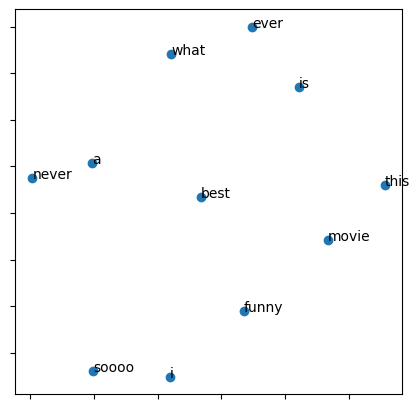

In [54]:
# Plot the t-SNE results
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])

for i, word in enumerate(vocabs):
    ax.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))

ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()


In [57]:
# Find similar words
similar_words = model.wv.most_similar(positive=["movie"], topn=3)
print("Words similar to 'movie':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


Words similar to 'movie':
this: 0.5436
is: 0.4318
funny: 0.3793


In [58]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords

# Assuming imdb_data is a DataFrame with 'review' and 'sentiment' columns

# Example IMDB data (replace this with actual dataset loading)
imdb_data = pd.DataFrame({
    'review': ["This movie is great!", "Worst movie ever.", "Loved it!", "Not good at all.", "Absolutely fantastic!"],
    'sentiment': ["positive", "negative", "positive", "negative", "positive"]
})

# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = text.split()
    return tokens

# Preprocess the reviews
imdb_data['review'] = imdb_data['review'].apply(preprocess_text)

# Remove stop words
stop_words = set(stopwords.words('english'))
imdb_data['review'] = imdb_data['review'].apply(lambda x: [word for word in x if word not in stop_words])

# Function to get the average vector for a review
def get_review_vector(review, model):
    word_vectors = [model.wv[word] for word in review if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

# Convert reviews to vectors
X = np.array([get_review_vector(review, model) for review in imdb_data['review']])
y = imdb_data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 0.00%


In [60]:
import gensim.downloader as api

# Load pre-trained GloVe vectors
glove_vectors = api.load("glove-wiki-gigaword-50")

# Function to get the average vector for a review using GloVe vectors
def get_review_vector_glove(review, glove_model):
    word_vectors = [glove_model[word] for word in review if word in glove_model]
    if len(word_vectors) == 0:
        return np.zeros(glove_model.vector_size)
    return np.mean(word_vectors, axis=0)

# Convert reviews to vectors
X_glove = np.array([get_review_vector_glove(review, glove_vectors) for review in imdb_data['review']])

# Split the data
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X_glove, y, test_size=0.2, random_state=42)

# Train a classifier
classifier_glove = LogisticRegression()
classifier_glove.fit(X_train_glove, y_train_glove)

# Predict and evaluate
y_pred_glove = classifier_glove.predict(X_test_glove)
accuracy_glove = accuracy_score(y_test_glove, y_pred_glove)
print("Accuracy with GloVe: {:.2f}%".format(accuracy_glove * 100))


[==================================================] 100.0% 66.0/66.0MB downloaded
Accuracy with GloVe: 0.00%
